# Training Deep Q-Learning Agent

In [1]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dqn import QAgent

In [2]:
# define environment
env = gym.make('LunarLander-v2', render_mode='rgb_array')

# define parameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
episodes = 200
batch_size = 64

# define and train agent
agent = QAgent(env)
returns, steps = agent.training(env, batch_size, episodes)

env.close()

episode: 1/200, return: -130, epsilon: 0.95, steps: 92


KeyboardInterrupt: 

In [3]:
print(f'Average return: {np.mean(returns)}')
print(f'Average return last 50 episodes: {np.mean(returns[-50:])}')

Average return: -307.15037868867074
Average return last 50 episodes: -431.1990219600019


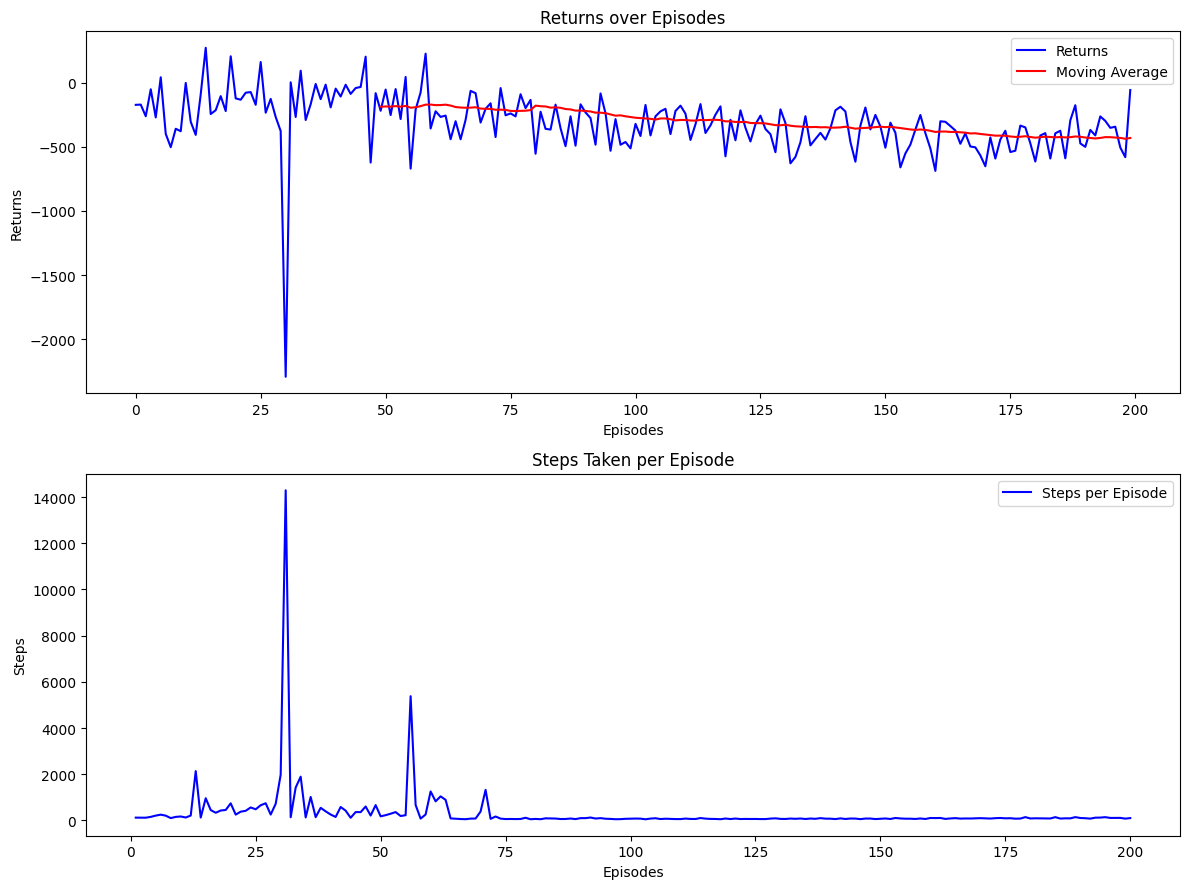

In [5]:
MA = pd.Series(returns).rolling(window=50).mean()
episodes = list(steps.keys())
steps_data = list(steps.values())

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 9))

# Plot returns and moving average
sns.lineplot(data=returns, label='Returns', color='blue', ax=axs[0])
sns.lineplot(data=MA, label='Moving Average', color='red', ax=axs[0])
axs[0].set_ylabel('Returns')
axs[0].set_xlabel('Episodes')
axs[0].set_title('Returns over Episodes')
axs[0].legend()

# Plot steps taken per episode
sns.lineplot(x=episodes, y=steps_data, label='Steps per Episode', color='blue', ax=axs[1])
axs[1].set_ylabel('Steps')
axs[1].set_xlabel('Episodes')
axs[1].set_title('Steps Taken per Episode')
axs[1].legend()

plt.tight_layout()
plt.show()